3. Create a simple 2-D Convolutional Neural Network (CNN) model using keras
with tensorflow backend for the MNIST fashion dataset. Perform the following.

a) Preparing the data
b) Build and compile the model
c) Train and evaluate the model
d) Save the model to disk for reuse

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Data Processing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)
num_classes = len(np.unique(y_train)) 

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Model
inp = Input(shape=input_shape)
_ = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
_ = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(_)
_ = MaxPool2D(pool_size=(2, 2))(_)
_ = Dropout(0.25)(_)
_ = Flatten()(_)
_ = Dense(units=128, activation='relu')(_)
_ = Dropout(0.2)(_)
_ = Dense(units=num_classes, activation='softmax')(_)
model = Model(inputs=inp, outputs=_)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               117977


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [7]:
history = model.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=12, validation_split=0.3)

2022-01-22 07:49:49.205948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12
329/329 [==============================] - 45s 135ms/step - loss: 0.5016 - accuracy: 0.8238 - val_loss: 0.3247 - val_accuracy: 0.8850
Epoch 2/12
329/329 [==============================] - 43s 132ms/step - loss: 0.3127 - accuracy: 0.8870 - val_loss: 0.2786 - val_accuracy: 0.9008
Epoch 3/12
329/329 [==============================] - 43s 132ms/step - loss: 0.2610 - accuracy: 0.9051 - val_loss: 0.2447 - val_accuracy: 0.9121
Epoch 4/12
329/329 [==============================] - 44s 133ms/step - loss: 0.2254 - accuracy: 0.9162 - val_loss: 0.2393 - val_accuracy: 0.9124
Epoch 5/12
329/329 [==============================] - 44s 133ms/step - loss: 0.1981 - accuracy: 0.9269 - val_loss: 0.2262 - val_accuracy: 0.9191
Epoch 6/12
329/329 [==============================] - 43s 132ms/step - loss: 0.1738 - accuracy: 0.9356 - val_loss: 0.2296 - val_accuracy: 0.9188
Epoch 7/12
329/329 [==============================] - 44s 134ms/step - loss: 0.1546 - accuracy: 0.9428 - val_loss: 0.2384 - val_ac

In [8]:
# Save the Model Training 
filename = 'Model_12_epochs.h5'
model.save(filename)

In [9]:
#To load a model that we have already trained and saved:
model.load_weights('Model_12_epochs.h5')

In [10]:
## Evaluation Model

loss, accuracy = model.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)
print(loss, accuracy)

0.2604917883872986 0.9207000136375427


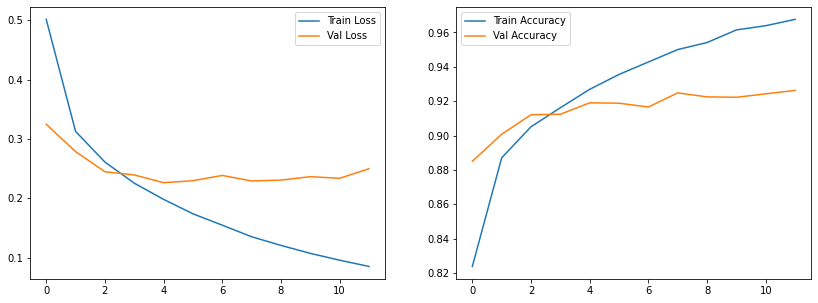

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()